In [2]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline

In [3]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape
# x , y , rgb channels(Value)

(555, 700, 3)

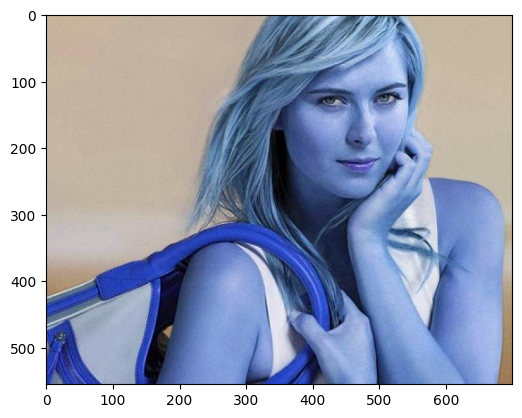

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

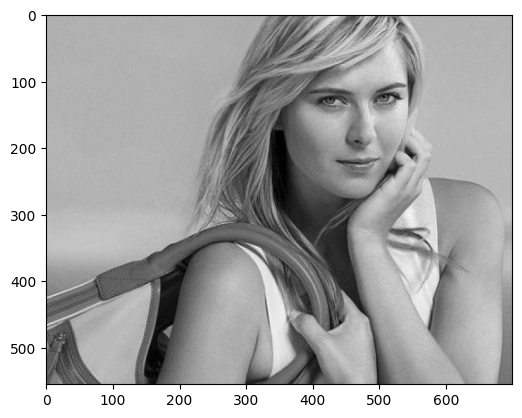

In [6]:
plt.imshow(gray , cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces
# returns x , y , width , height

array([[352,  38, 233, 233]])

In [8]:
(x , y , w , h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

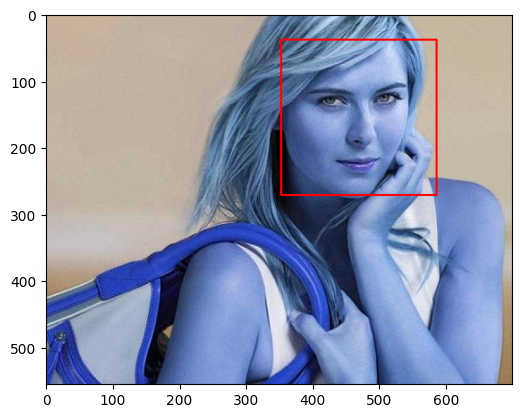

In [9]:
face_img = cv2.rectangle(img , (x,y) , (x+w , y+h) , (255,0,0) , 2 )
plt.imshow(face_img)

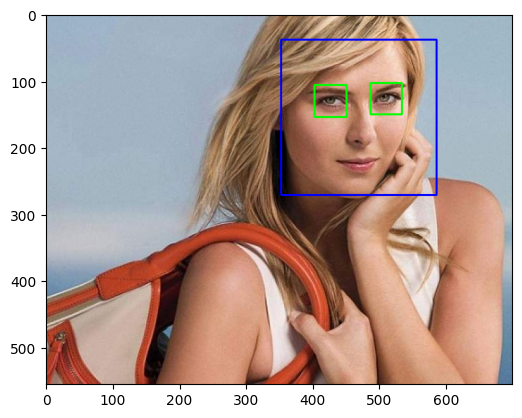

In [10]:
cv2.destroyAllWindows()

for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = face_img[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
plt.show()

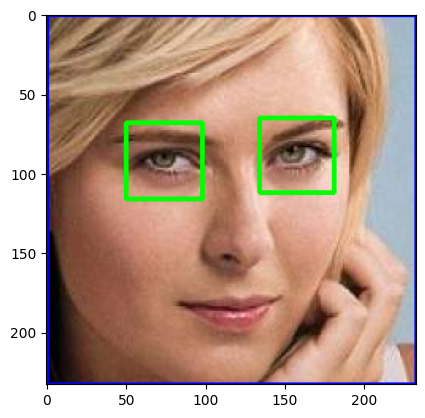

In [11]:
plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3 , 5 )
    for (x,y,w,h) in faces :
        roi_gray = gray[y:y+h , x:x+w]
        roi_color = img[y:y+h , x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2 : 
            return roi_color

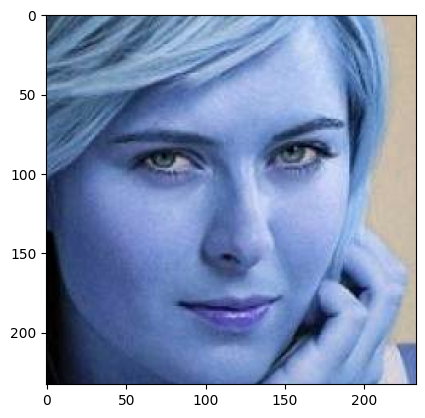

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

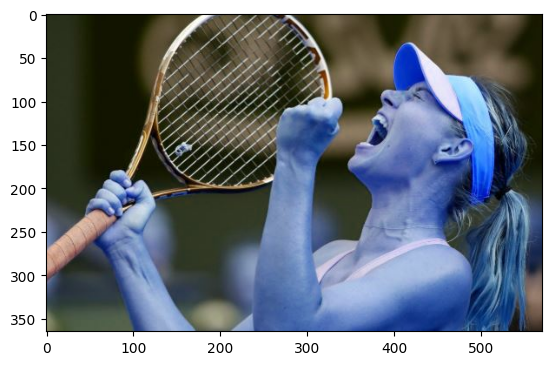

In [14]:
org_image_2 = cv2.imread('./test_images/sharapova2.JPG')
plt.imshow(org_image_2)

In [15]:
cropped_image_2 = get_cropped_image_if_2_eyes('./test_images/sharapova2.JPG')
cropped_image_2

In [16]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'


In [17]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [19]:
import shutil 
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs : 
    count = 1 
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None : 
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder : " , cropped_folder)
            cropped_file_name = celebrity_name + str(count) +".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path , roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 
    

cropped
lionel_messi
Generating cropped images in folder :  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder :  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder :  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder :  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder :  ./dataset/cropped/virat_kohli


In [21]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\

In [22]:
import numpy as np 
import cv2 
import pywt

#thanks stackoverflow !!
def w2d(img , mode='haar' , level = 1):
    imArray = img 
    #Datatype conversions
    #convert to grayscale
    
    imArray = cv2.cvtColor(imArray , cv2.COLOR_RGB2GRAY)
    #convert to float 
    imArray = np.float32(imArray)
    imArray /= 255 ;
    #compute coefficents
    coeffs = pywt.wavedec2(imArray , mode , level=level)
    
    #Process coefficents
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0 ;
    
    #reconsutruction
    imArray_H = pywt.waverec2(coeffs_H , mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
    

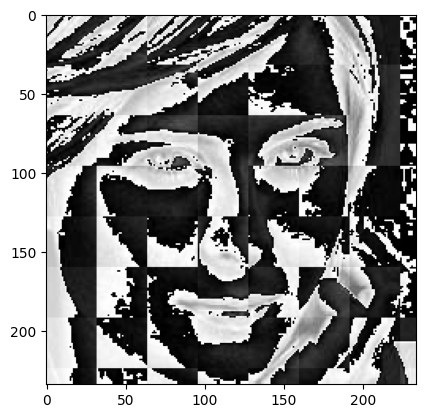

In [23]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [24]:
class_dict = {}
count = 0 
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count+=1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [25]:
x = []
y = []

for celebrity_name , training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None :
            continue
        scalled_raw_img = cv2.resize(img , (32,32))
        img_har = w2d(img , 'db1' ,5)
        scalled_img_har  = cv2.resize(img_har,(32,32))
        combined_image = np.vstack((scalled_raw_img.reshape(32*32*3 , 1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_image)
        y.append(class_dict[celebrity_name])

In [26]:
len(x[0]) 
32*32 *3 + 32*32 # this gives the vertical stack number actually after + har_image (means wavelength transfomred image) before + colore or you can say raw image

4096

In [27]:
len(y)

159

In [28]:
X = np.array(x).reshape(len(x) , 4096).astype(float)
X.shape

(159, 4096)

In [29]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X,y)
pipe = Pipeline([('scaler' , StandardScaler()) , ('svc' , SVC(kernel='rbf', C=10))])
pipe.fit(X_train , y_train)
pipe.score(X_test , y_test)

0.825

In [32]:
print(classification_report(y_test , pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.78      0.88      0.82         8
           2       0.71      0.62      0.67         8
           3       1.00      0.75      0.86         8
           4       0.85      1.00      0.92        11

    accuracy                           0.82        40
   macro avg       0.83      0.81      0.81        40
weighted avg       0.83      0.82      0.82        40



In [33]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [34]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define model parameters
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}

C:\Users\Sadia Imran\AppData\Local\Temp\ipykernel_4912\1894048159.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [35]:
# Initialize lists to store results
scores = []
best_estimators = {}

# Perform GridSearchCV for each model
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

# Create a DataFrame to display the results
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df)

C:\Users\Sadia Imran\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Sadia Imran\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Sadia Imran\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Sadia Imran\AppData\Roaming\Python\Python312\site-pa

                 model  best_score  \
0                  svm    0.864493   
1        random_forest    0.705435   
2  logistic_regression    0.865217   

                                    best_params  
0          {'svc__C': 10, 'svc__kernel': 'rbf'}  
1  {'randomforestclassifier__n_estimators': 10}  
2                  {'logisticregression__C': 1}  


In [36]:
best_estimators['svm'].score(X_test , y_test)

0.825

In [37]:
best_estimators['logistic_regression'].score(X_test , y_test)

0.9

In [38]:
best_estimators['random_forest'].score(X_test , y_test)

0.675

In [39]:
best_clf = best_estimators['logistic_regression']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm


array([[ 4,  1,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  1,  7,  0,  0],
       [ 0,  0,  1,  7,  0],
       [ 1,  0,  0,  0, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

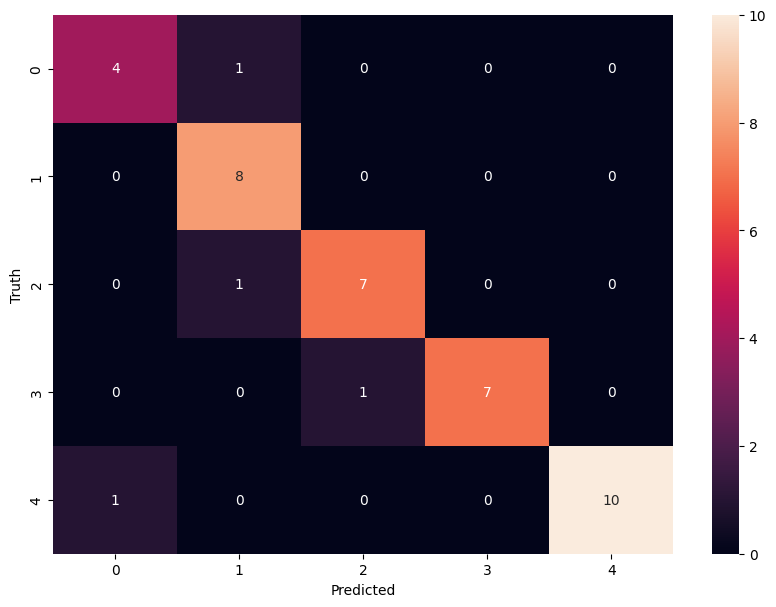

In [40]:
import seaborn as sns 
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [42]:
!pip3 install joblib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [44]:
import json 
with open("class_dictionary.json" , "w") as f : 
    f.write(json.dumps(class_dict))
